#### Importando as dependências

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

#### Instânciando a rede e setando a topologia

2024-06-16 21:00:40,991: Qubit 0 adicionado à memória do Host 0.
2024-06-16 21:00:40,991: Qubit 0 criado com fidelidade inicial 0.9000011700299704 e adicionado à memória do Host 0.
2024-06-16 21:00:40,991: Qubit 1 adicionado à memória do Host 0.
2024-06-16 21:00:40,991: Qubit 1 criado com fidelidade inicial 0.24200691663264728 e adicionado à memória do Host 0.
2024-06-16 21:00:40,991: Qubit 2 adicionado à memória do Host 0.
2024-06-16 21:00:40,991: Qubit 2 criado com fidelidade inicial 0.5911270548188228 e adicionado à memória do Host 0.
2024-06-16 21:00:40,991: Qubit 3 adicionado à memória do Host 0.
2024-06-16 21:00:40,999: Qubit 3 criado com fidelidade inicial 0.580321059367513 e adicionado à memória do Host 0.
2024-06-16 21:00:40,999: Qubit 4 adicionado à memória do Host 0.
2024-06-16 21:00:40,999: Qubit 4 criado com fidelidade inicial 0.17949147045646507 e adicionado à memória do Host 0.
2024-06-16 21:00:40,999: Qubit 5 adicionado à memória do Host 0.
2024-06-16 21:00:40,999: Qubi

Hosts inicializados
Canais inicializados


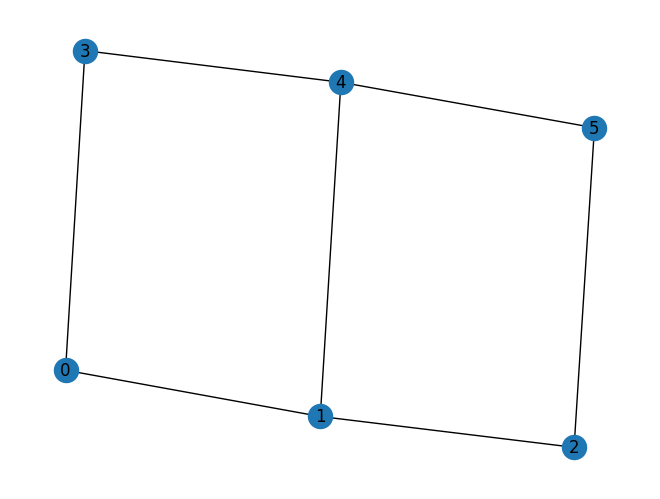

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 2, 3)
rede.draw()

#### Criando pares EPR

In [3]:
# alice = rede.get_host(0)
# bob = rede.get_host(1)

##### Usando arestas aleatórias

In [4]:

arestas = list(rede.edges)
print(arestas)

#Randomizando arestas
aresta_aleatorias = random.sample(arestas, 1)[0]
print(aresta_aleatorias)

#atribuindo hosts a aresta
x,y = aresta_aleatorias
alice = rede.get_host(x)
bob = rede.get_host(y)

[(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 4), (4, 5)]
(0, 1)


In [5]:
#Fazer um for pra executar o protocolo pra cada aresta escolhida.
for aresta in arestas:
    x, y = aresta
    alice = rede.get_host(x)
    bob = rede.get_host(y)
    print(f"Aresta {aresta}: alice = {alice}, bob = {bob}")
    
    # Criação de pares EPR
    alice.add_qubit(Qubit(0))
    bob.add_qubit(Qubit(1))

    # Acessando a memória dos hosts
    print(alice.memory)
    print(bob.memory)
    print("Canais: ", rede.edges)

    # Usando as funções da camada física
    rede.start_hosts_and_channels()
    rede.physical.echp_on_replay(x, y)

    # acessando as arestas
    rede.edges[x, y]


2024-06-16 21:00:41,899: Qubit 0 adicionado à memória do Host 0.
2024-06-16 21:00:41,899: Qubit 1 adicionado à memória do Host 3.


Aresta (0, 3): alice = 0, bob = 3
[<quantumnet.objects.qubit.Qubit object at 0x000001FFE6D96ED0>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE675F390>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D96F10>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6777E90>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D96FD0>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE675F850>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE675CE90>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D96F50>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D97E10>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D97010>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D97B50>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D97D90>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D9D7D0>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D97590>, <quantumnet.objects.qubit.Qubit object at 0x000001FFE6D96B90>, <quantumnet.objects.

AttributeError: 'Network' object has no attribute 'start_hosts_and_channels'